<a href="https://colab.research.google.com/github/JishnaMR/sms_spam_detection/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import nltk
import seaborn as sns

In [ ]:
#import data
data = pd.read_csv('/content/drive/MyDrive/Minorproject_teachnook/spam.csv', encoding='latin1')


In [ ]:
print(data.head())      #display first few rows
print(data.info())      #Get basic information about the dataset

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [ ]:
# Selects all rows and the first two columns
data_subset = data.iloc[:, :2]

#print first few rows
print(data_subset.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
#rename the columns
data_subset.columns = ['label', 'message']
data_subset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Check for missing values
print(data_subset.isnull().sum())


label      0
message    0
dtype: int64


In [ ]:
#Check for class distribution

print(data_subset['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#split the data into training and testing sets
X_train, X_test, y_train, y_test =train_test_split(data_subset['message'],data_subset['label'],test_size=0.2, random_state=42)

In [ ]:
#Data Preprocessing Text Cleaning: Perform text cleaning tasks such as lowercasing, removing punctuation, and eliminating stop words.
import re
data_subset['message'] = data_subset['message'].apply(lambda x: re.sub(r'\w',' ',x)) #remove special characters
data_subset['message'] = data_subset['message'].apply(lambda x: x.lower()) #convert to lowercase
data_subset['message'] = data_subset['message'].apply(lambda x: re.sub(r'\s+',' ',x).strip()) #remove extra spaces



<ipython-input-9-680cf569e288>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['message'] = data_subset['message'].apply(lambda x: re.sub(r'\w',' ',x)) #remove special characters
<ipython-input-9-680cf569e288>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['message'] = data_subset['message'].apply(lambda x: x.lower()) #convert to lowercase
<ipython-input-9-680cf569e288>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
#feature_extraction
#Convert text data into numerical features using techniques like TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
#initialize the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=LogisticRegression()


In [ ]:
#train the model
model.fit(X_train_tfidf,y_train)


LogisticRegression()

In [ ]:
#model evaluation
y_pred=model.predict(X_test_tfidf)

In [ ]:
#calculate accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy * 100:.2f}%')

Accuracy:96.77%


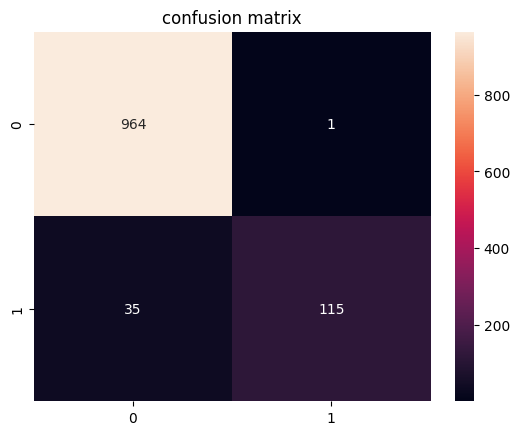

In [ ]:
#display confusion matrix
import matplotlib.pyplot as plt
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.title('confusion matrix')
plt.show()


In [ ]:
print(conf_mat)

[[964   1]
 [ 35 115]]


In [ ]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

